## 3.0 Vizualisations

This notebook assembles data to create the vizualisations needed for the project.

In [1]:
library("tidyverse")
library("ggmap")
library("patchwork")
library("extrafont")
library("cowplot")

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.0     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.5
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.

Please cite ggmap if you use it! See citation("ggmap") for details.

Registering fonts with R


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************



Attaching package: 'cowplot'


The following object is masked from 'package:patchwork':

    align_plots


The following object is masked from 'package:ggmap':


In [2]:
align_plots <- patchwork::align_plots

### __Figure 1__. Experimental sites locations

In [3]:
sites_loc <- read_csv("data/Potato_df.csv") %>% 
                    select(NoEssai, LonDD, LatDD) %>%
                    unique()
#head(sites_loc)
glimpse(sites_loc)

Parsed with column specification:
cols(
  .default = col_double(),
  test_type = col_character(),
  DatePlantation = col_date(format = ""),
  DateRecolte = col_date(format = ""),
  PrecCropFiveClasses = col_character(),
  Cultivar = col_character(),
  Maturity5 = col_character(),
  pHactifMethode = col_character(),
  MOouCtot = col_character(),
  ExtractifMethode = col_character(),
  AlSolTabi = col_logical(),
  Texture = col_character(),
  SerieSol = col_character(),
  RendRejet = col_logical()
)

See spec(...) for full column specifications.

Warning message:
"3793 parsing failures.
 row       col           expected      actual                 file
1021 RendRejet 1/0/T/F/TRUE/FALSE 11.08166667 'data/Potato_df.csv'
1022 RendRejet 1/0/T/F/TRUE/FALSE 5.312605042 'data/Potato_df.csv'
1023 RendRejet 1/0/T/F/TRUE/FALSE 7.126923077 'data/Potato_df.csv'
1024 RendRejet 1/0/T/F/TRUE/FALSE 8.243697479 'data/Potato_df.csv'
1025 RendRejet 1/0/T/F/TRUE/FALSE 9.5048      'data/Potato_df.csv'
.... .

Observations: 4,937
Variables: 3
$ NoEssai <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, ...
$ LonDD   <dbl> -72.33861, -72.33861, -72.33083, -72.24250, -72.24250, -72....
$ LatDD   <dbl> 46.75306, 46.75306, 46.76444, 48.79722, 48.79722, 48.79722,...


Source : http://tile.stamen.com/toner-lite/7/36/43.png

Source : http://tile.stamen.com/toner-lite/7/37/43.png

Source : http://tile.stamen.com/toner-lite/7/38/43.png

Source : http://tile.stamen.com/toner-lite/7/39/43.png

Source : http://tile.stamen.com/toner-lite/7/36/44.png

Source : http://tile.stamen.com/toner-lite/7/37/44.png

Source : http://tile.stamen.com/toner-lite/7/38/44.png

Source : http://tile.stamen.com/toner-lite/7/39/44.png

Source : http://tile.stamen.com/toner-lite/7/36/45.png

Source : http://tile.stamen.com/toner-lite/7/37/45.png

Source : http://tile.stamen.com/toner-lite/7/38/45.png

Source : http://tile.stamen.com/toner-lite/7/39/45.png

Source : http://tile.stamen.com/toner-lite/7/36/46.png

Source : http://tile.stamen.com/toner-lite/7/37/46.png

Source : http://tile.stamen.com/toner-lite/7/38/46.png

Source : http://tile.stamen.com/toner-lite/7/39/46.png

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



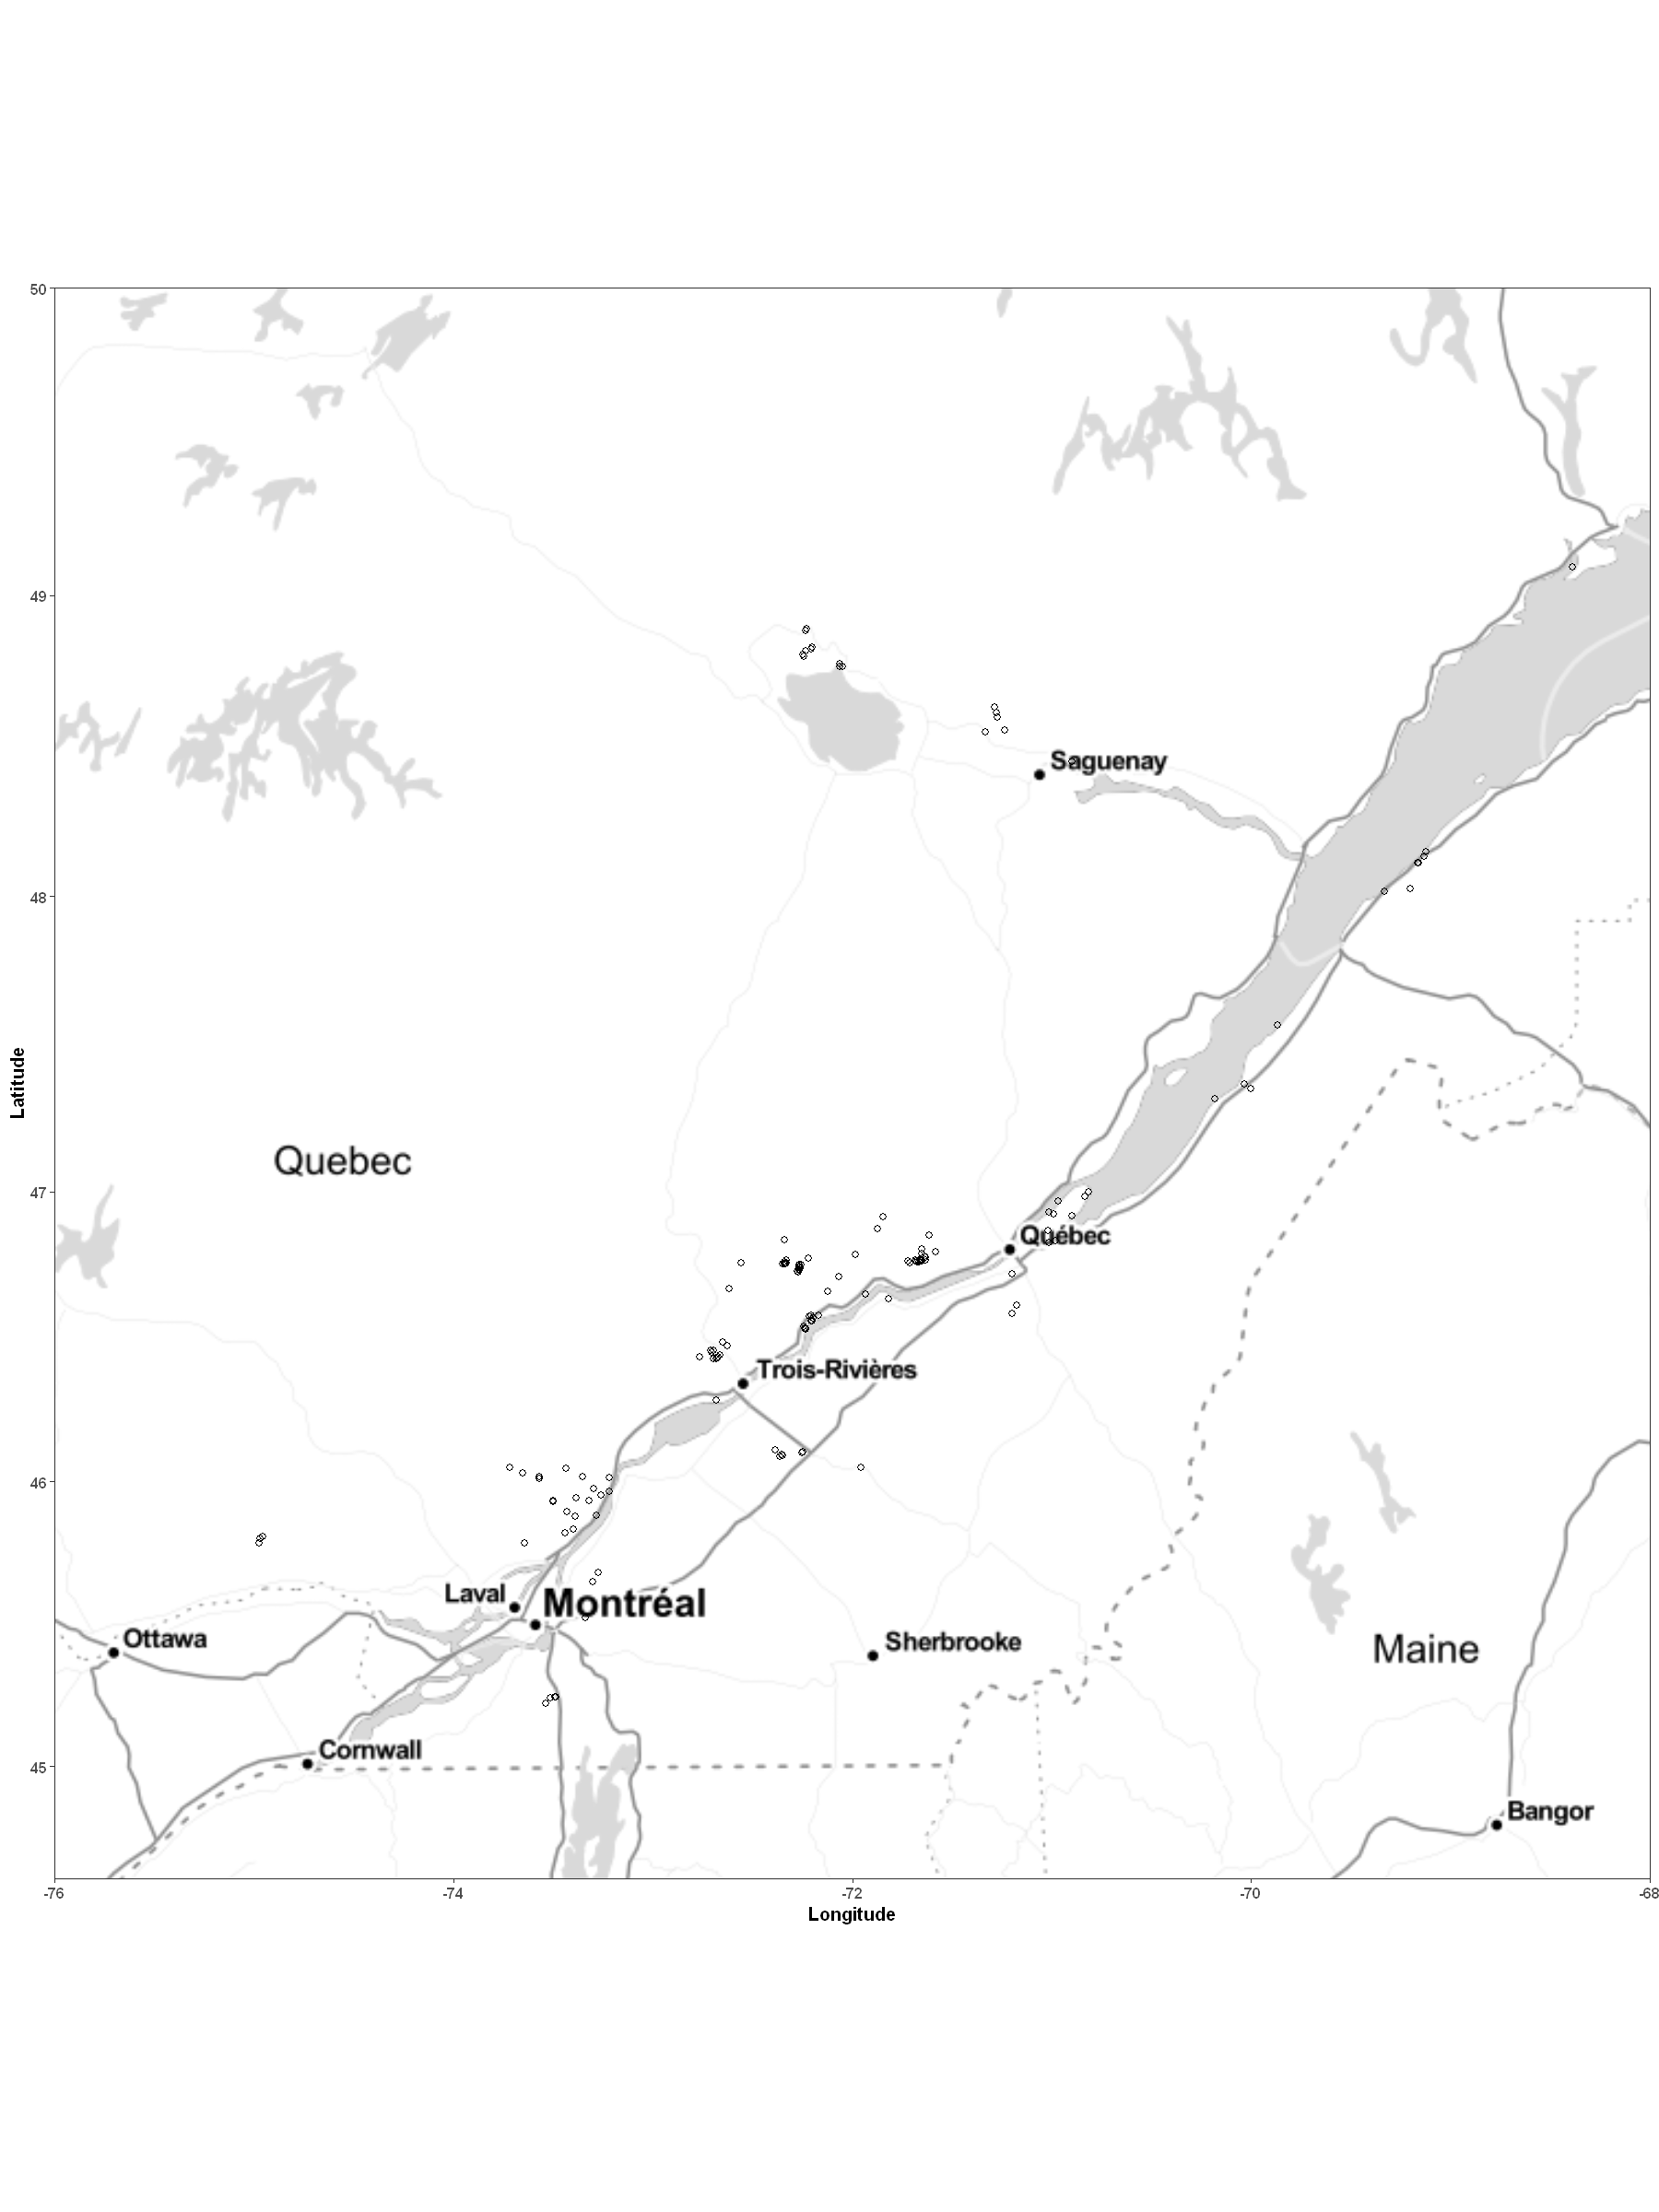

In [4]:
options(warn = -1)
options(repr.plot.width = 15, repr.plot.height = 20)
qc_map <- get_stamenmap(bbox = c(left = -76, right = -68, bottom = 44.6, top = 50), 
                        zoom = 7, maptype = 'toner-lite')
p <- ggmap(qc_map) +
  geom_point(data = sites_loc, mapping = aes(x = LonDD, y = LatDD), size = 2, shape = 1) + 
  labs(x = "Longitude", y = "Latitude") +
  theme_bw()
p + theme(text = element_text(family = "Arial", face = "bold", size = 12)) # Font Size of All Text Elements
ggsave("plosFigs/Fig1.tiff", dpi = 300)#, width = 6, height = 9, dpi = 300)
ggsave("images/Fig1.png", dpi = 300)#, width = 6, height = 9, dpi = 300)
options(warn = 0)

### __Figure 2__. Relative importance of features in crop models

The relative importance of features in crop models was assessed using regression trees and stored as csvs in the `output` folder, as `output/varImp_*.csv`.

In [5]:
varImp_yield <- read_csv('output/varImp_yield.csv')
varImp_ilrSML <- read_csv('output/varImp_ilrSML.csv')
varImp_ilrSM <- read_csv('output/varImp_ilrSM.csv')
varImp_sg <- read_csv('output/varImp_sg.csv')

Parsed with column specification:
cols(
  ID = col_double(),
  columns = col_character(),
  importance = col_double(),
  en = col_character()
)

Parsed with column specification:
cols(
  ID = col_double(),
  columns = col_character(),
  importance = col_double(),
  en = col_character()
)

Parsed with column specification:
cols(
  ID = col_double(),
  columns = col_character(),
  importance = col_double(),
  en = col_character()
)

Parsed with column specification:
cols(
  ID = col_double(),
  columns = col_character(),
  importance = col_double(),
  en = col_character()
)



I put all these tables in a list.

In [6]:
varimp <- list("Marketable yield" = varImp_yield,
               "Tuber-size balance [MS | L]" = varImp_ilrSML,
               "Tuber-size balance [M | S]" = varImp_ilrSM,
               "Specific gravity" = varImp_sg)

This is the plot function to be applied to the list.

In [7]:
gg_varimp_f <- function(df) {
  df %>%
    mutate(en = fct_reorder(en, importance)) %>%
    ggplot(aes(x = en, y = importance)) +
    geom_col() +
    labs(x = "", y = "Feature relative importance") +
    coord_flip() +
    theme(text = element_text(family = "Arial", face = "bold", size = 12)) +
    theme_bw()
}

I map the plot function to the list then add a title.

In [8]:
gg_varimp <- list()
for (i in seq_along(varimp)) {
    gg_varimp[[i]] <- gg_varimp_f(varimp[[i]]) + labs(title = names(varimp)[i])
}

All plots together, and export.

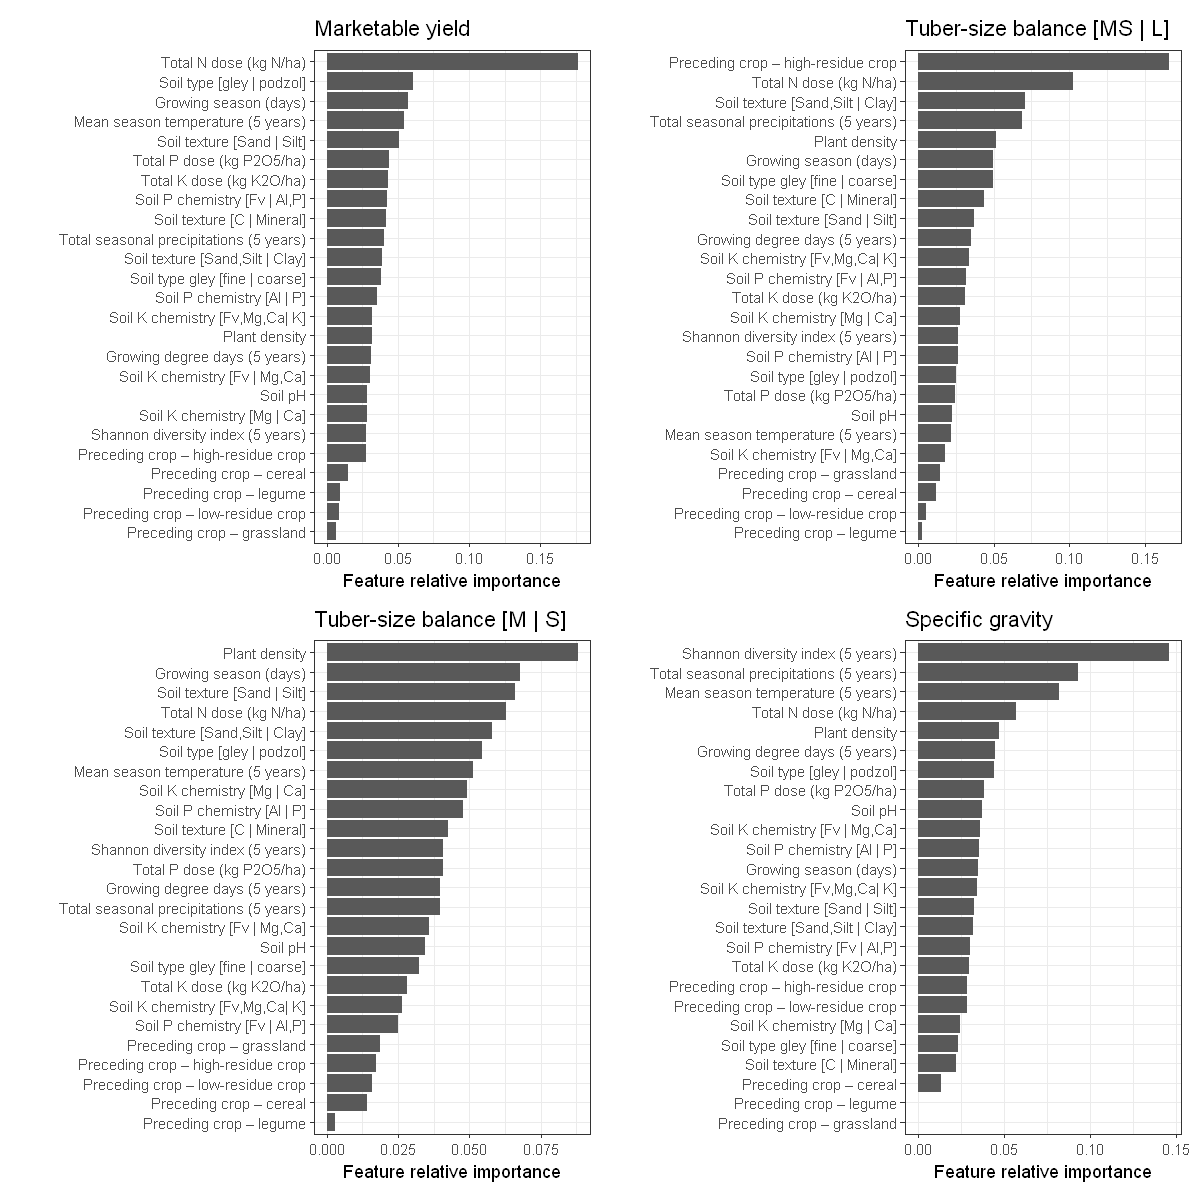

In [9]:
options(warn = -1)
options(repr.plot.height = 10, repr.plot.width = 10)
(gg_varimp[[1]] + gg_varimp[[2]]) / (gg_varimp[[3]] + gg_varimp[[4]]) +
  ggsave("plosFigs/Fig2.tiff", width = 10, height = 10, dpi = 300) +
  ggsave("images/Fig2.png", width = 10, height = 10, dpi = 300)
options(warn = 0)

### __Figure 3__. Loss scores for each model

The scores are stored in `output/scores*.csv`. We load them and bind them all together.

In [10]:
scores <- read.csv('output/scoresYield.csv') %>%
    bind_rows(read.csv('output/scoresTsmsl.csv')) %>% 
    bind_rows(read.csv('output/scoresTsms.csv')) %>% 
    bind_rows(read.csv('output/scoresSg.csv'))

Warning message in bind_rows_(x, .id):
"Unequal factor levels: coercing to character"
Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"
Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"
Warning message in bind_rows_(x, .id):
"Unequal factor levels: coercing to character"
Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"
Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"
Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"
Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"
Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"
Warning message in bind_rows_(x, .id):
"binding character and fac

In [11]:
scores <- scores %>% 
      rename(Model = X)
scores

Model,Train_R2,Train_MAE,Train_RMSE,Test_R2,Test_MAE,Test_RMSE,Target
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Mitscherlich,0.3499065,6.225086,8.105052,0.3743418,8.324857,10.77479,Yield
k-nearest neighbors,0.9170000,1.600000,2.890000,0.5210000,5.500000,7.27000,Yield
Random forest,0.8980000,2.290000,3.210000,0.5920000,5.070000,6.72000,Yield
Neural networks,0.7830000,3.540000,4.690000,0.4870000,5.570000,7.53000,Yield
Gaussian processes,0.8360000,3.060000,4.080000,0.5790000,5.100000,6.82000,Yield
k-nearest neighbors,0.7160000,0.714400,0.981100,0.5510000,0.906900,1.18300,"[M, S | L]"
Random forest,0.8730000,0.394200,0.657100,0.5710000,0.817400,1.15600,"[M, S | L]"
Neural networks,0.7290000,0.706300,0.959400,0.5700000,0.862700,1.15820,"[M, S | L]"
Gaussian processes,0.8310000,0.507600,0.756600,0.6430000,0.761300,1.05530,"[M, S | L]"


The table is transformed to the long format, with some arangements to separate the name of the loss function and the set.

In [12]:
scores_long <- scores %>%
  pivot_longer(names_to = "Loss", values_to = "Score", -c(Model, Target))
scores_long$Set <- ifelse(str_detect(scores_long$Loss, "Train"), "Training", "Testing")
scores_long$Loss <- ifelse(str_detect(scores_long$Loss, "_R2"), "R²", 
                           ifelse(str_detect(scores_long$Loss, "_MAE"), "MAE", "RMSE"))
#scores_long$Loss <- scores_long$Loss %>% fct_relevel("R²", "RMSE", "MAE")
scores_long %>%
  sample_n(10)

Model,Target,Loss,Score,Set
<chr>,<chr>,<chr>,<dbl>,<chr>
Random forest,[S | M],RMSE,0.2294,Training
k-nearest neighbors,SG,MAE,0.0049,Testing
k-nearest neighbors,[S | M],RMSE,0.4417,Testing
Random forest,Yield,R²,0.5920,Testing
Random forest,[S | M],R²,0.6080,Testing
Random forest,Yield,MAE,2.2900,Training
k-nearest neighbors,"[M, S | L]",RMSE,0.9811,Training
Neural networks,Yield,RMSE,4.6900,Training
Random forest,SG,MAE,0.0017,Training


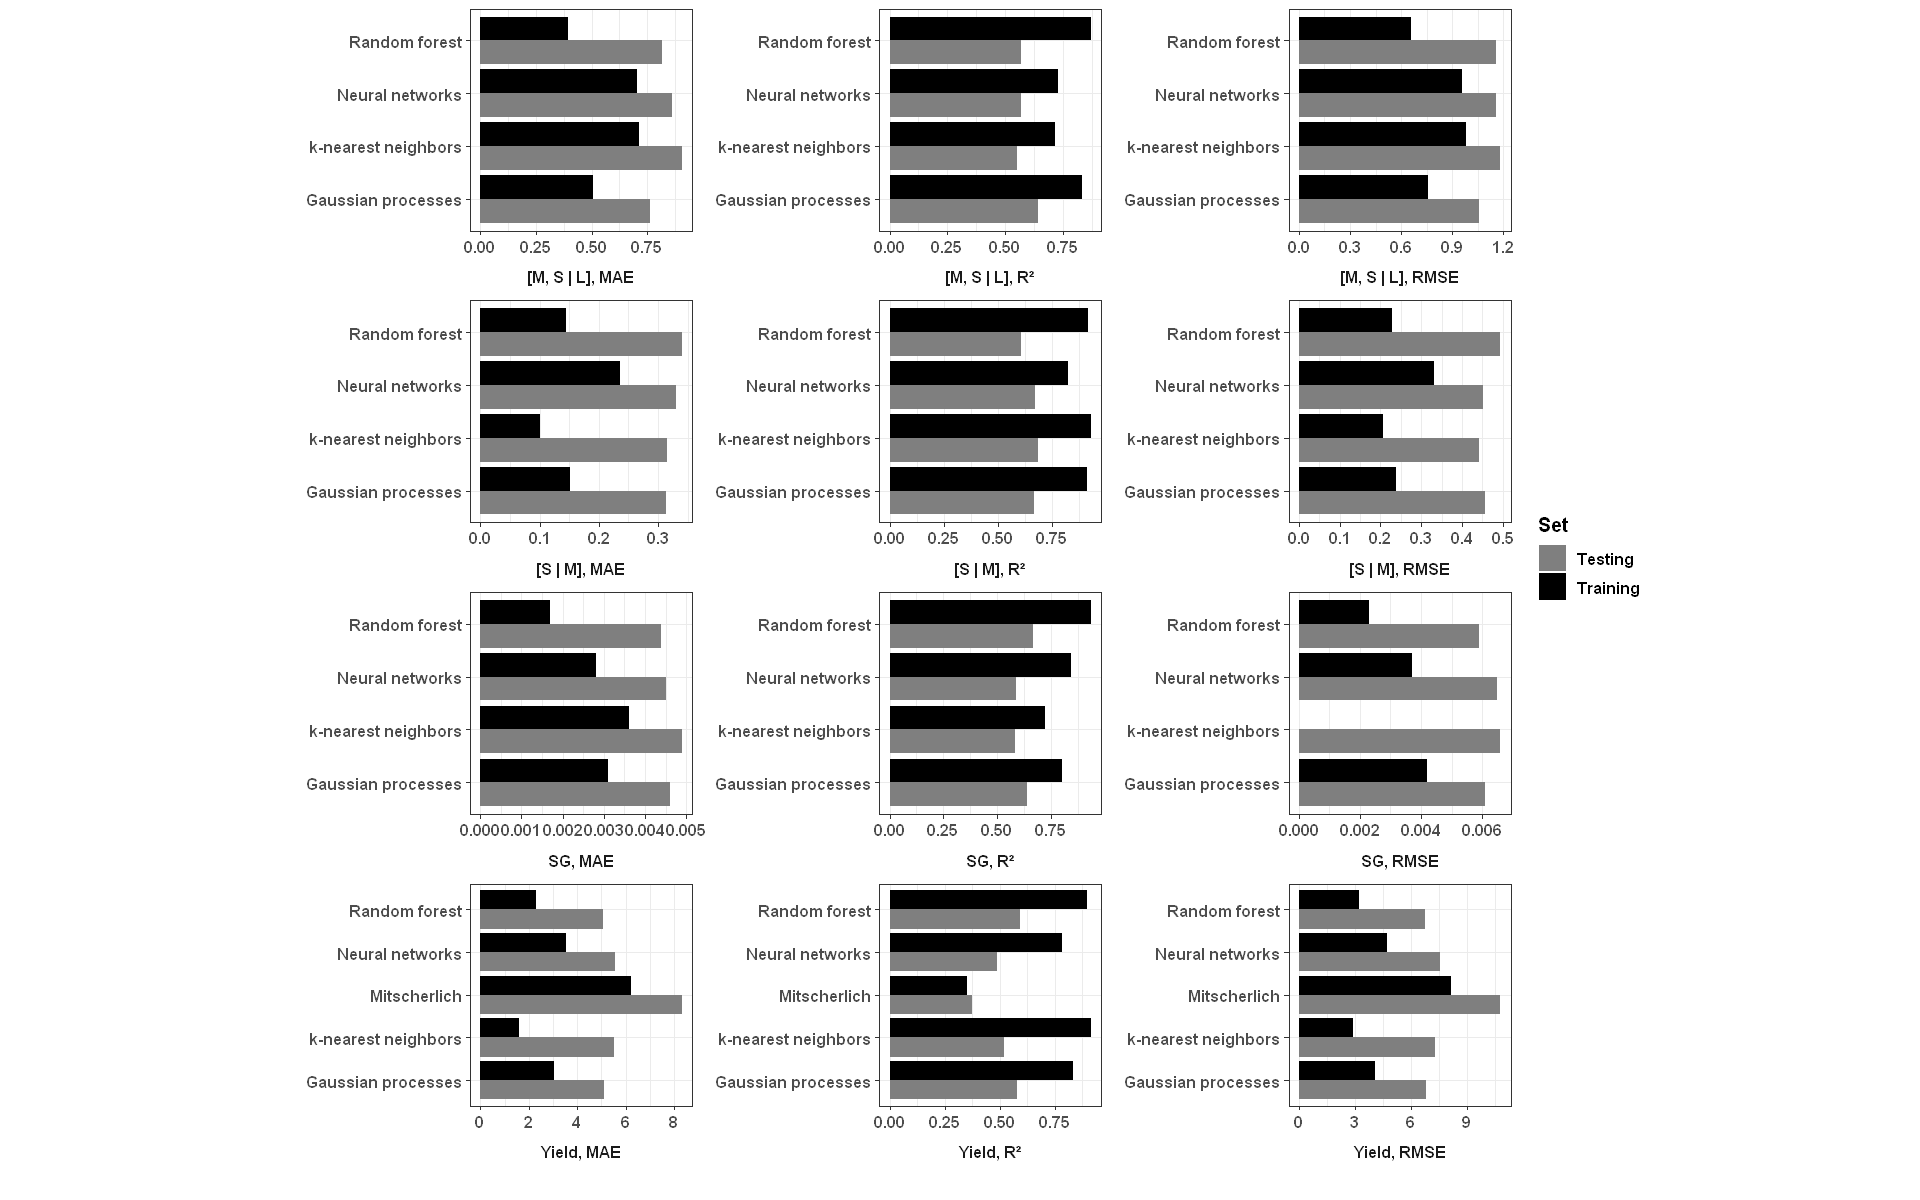

In [13]:
options(warn = -1)
options(repr.plot.height = 10, repr.plot.width = 16)
scores_long %>%
  mutate(Target_Loss = paste(Target, Loss, sep = ", ")) %>%
  ggplot(aes(x = Model, y = Score, fill = Set)) + 
  geom_col(position = "dodge") +
  facet_wrap( ~ Target_Loss, scales = "free", strip.position="bottom", ncol = 3) +
  labs(x = "", y = "") +
  coord_flip() +
  theme_bw() +
  scale_fill_manual(values = c("grey50", "black")) +
  theme(text = element_text(family = "Arial", face = "bold", size = 12),
        aspect.ratio = 1,
        strip.background = element_blank(),
        strip.placement = "outside") +
  ggsave("plosFigs/Fig3.tiff", width = 12, height = 12, dpi = 300) +
  ggsave("images/Fig3.png", width = 12, height = 12, dpi = 300)
options(warn = 0)

### __Figure 4__. Response curves: yield

In [4]:
yield_sample_N <- read_csv("output/yield_model_Ndata.csv")
yield_sample_P <- read_csv("output/yield_model_Pdata.csv")
yield_sample_K <- read_csv("output/yield_model_Kdata.csv")

yield_sample_N <- yield_sample_N %>%
  rename(Dose = NtotDose) %>%
  mutate(Fertilizer = paste("N, sample no", yield_sample_N$Sample[1]))

yield_sample_P <- yield_sample_P %>%
  rename(Dose = P) %>%
  mutate(Fertilizer = paste("P, sample no", yield_sample_P$Sample[1]))

yield_sample_K <- yield_sample_K %>%
  rename(Dose = K) %>%
  mutate(Fertilizer = paste("K, sample no", yield_sample_K$Sample[1]))

Warning message:
"Missing column names filled in: 'X1' [1]"
Parsed with column specification:
cols(
  X1 = col_double(),
  RendVendable = col_double(),
  NtotDose = col_double(),
  Sample = col_double()
)

Warning message:
"Missing column names filled in: 'X1' [1]"
Parsed with column specification:
cols(
  X1 = col_double(),
  RendVendable = col_double(),
  PtotDose = col_double(),
  P = col_double(),
  Sample = col_double()
)

Warning message:
"Missing column names filled in: 'X1' [1]"
Parsed with column specification:
cols(
  X1 = col_double(),
  RendVendable = col_double(),
  KtotDose = col_double(),
  K = col_double(),
  Sample = col_double()
)



In [5]:
yield_samples <- yield_sample_N %>%
  bind_rows(yield_sample_P) %>%
  bind_rows(yield_sample_K) %>%
  select(RendVendable, Dose, Fertilizer) %>%
  mutate(Fertilizer = fct_relevel(Fertilizer, "N, sample no 8804", "P, sample no 412", "K, sample no 320"))

yield_samples %>% head()

RendVendable,Dose,Fertilizer
<dbl>,<dbl>,<fct>
26.56175,0,"N, sample no 8804"
26.67978,50,"N, sample no 8804"
28.93770,50,"N, sample no 8804"
26.92240,50,"N, sample no 8804"
21.72240,50,"N, sample no 8804"
27.95847,50,"N, sample no 8804"


In [6]:
yield_mitsch_N <- read_csv("output/yield_mitsch_N.csv")
yield_mitsch_P <- read_csv("output/yield_mitsch_P.csv")
yield_mitsch_K <- read_csv("output/yield_mitsch_K.csv")

yield_model_N <- read_csv("output/yield_model_N.csv")
yield_model_P <- read_csv("output/yield_model_P.csv")
yield_model_K <- read_csv("output/yield_model_K.csv")

Parsed with column specification:
cols(
  NtotDose = col_double(),
  PtotDose = col_double(),
  KtotDose = col_double(),
  Prediction = col_double(),
  benefit = col_double()
)

Parsed with column specification:
cols(
  NtotDose = col_double(),
  PtotDose = col_double(),
  KtotDose = col_double(),
  Prediction = col_double(),
  benefit = col_double(),
  P = col_double()
)

Parsed with column specification:
cols(
  NtotDose = col_double(),
  PtotDose = col_double(),
  KtotDose = col_double(),
  Prediction = col_double(),
  benefit = col_double(),
  K = col_double()
)

Warning message:
"Missing column names filled in: 'X1' [1]"
Parsed with column specification:
cols(
  X1 = col_double(),
  NtotDose = col_double(),
  PtotDose = col_double(),
  KtotDose = col_double(),
  yield_knn = col_double(),
  yield_rf = col_double(),
  yield_nn = col_double(),
  yield_gp = col_double(),
  cost = col_double(),
  gp_revenue = col_double(),
  gp_benefit = col_double()
)

Warning message:
"Missing column

In [7]:
yield_model_N <- yield_model_N %>% 
  mutate(Dose = NtotDose) %>%
  select(Dose, starts_with("yield")) %>%
  pivot_longer(names_to = "Model", values_to = "Prediction", -Dose) %>%
  mutate(Model = str_replace(Model, "yield_knn", "k-nearest neighbors"),
         Model = str_replace(Model, "yield_rf", "Random forest"),
         Model = str_replace(Model, "yield_nn", "Neural networks"),
         Model = str_replace(Model, "yield_gp", "Gaussian processes"),
         Fertilizer = paste("N, sample no", yield_sample_N$Sample[1]))

yield_model_P <- yield_model_P %>% 
  mutate(Dose = P) %>%
  select(Dose, starts_with("yield")) %>%
  pivot_longer(names_to = "Model", values_to = "Prediction", -Dose) %>%
  mutate(Model = str_replace(Model, "yield_knn", "k-nearest neighbors"),
         Model = str_replace(Model, "yield_rf", "Random forest"),
         Model = str_replace(Model, "yield_nn", "Neural networks"),
         Model = str_replace(Model, "yield_gp", "Gaussian processes"),
         Fertilizer = paste("P, sample no", yield_sample_P$Sample[1]))

yield_model_K <- yield_model_K %>% 
  mutate(Dose = K) %>%
  select(Dose, starts_with("yield")) %>%
  pivot_longer(names_to = "Model", values_to = "Prediction", -Dose) %>%
  mutate(Model = str_replace(Model, "yield_knn", "k-nearest neighbors"),
         Model = str_replace(Model, "yield_rf", "Random forest"),
         Model = str_replace(Model, "yield_nn", "Neural networks"),
         Model = str_replace(Model, "yield_gp", "Gaussian processes"),
         Fertilizer = paste("K, sample no", yield_sample_K$Sample[1]))

In [8]:
yield_mitsch_N$Model <- yield_mitsch_P$Model <- yield_mitsch_K$Model <- "Mitscherlich"

yield_mitsch_N <- yield_mitsch_N %>% 
  mutate(Dose = NtotDose) %>%
  select(Dose, Model, Prediction) %>%
  mutate(Fertilizer = paste("N, sample no", yield_sample_N$Sample[1]))

yield_mitsch_P <- yield_mitsch_P %>% 
  mutate(Dose = P) %>%
  select(Dose, Model, Prediction) %>%
  mutate(Fertilizer = paste("P, sample no", yield_sample_P$Sample[1]))

yield_mitsch_K <- yield_mitsch_K %>% 
  mutate(Dose = K) %>%
  select(Dose, Model, Prediction) %>%
  mutate(Fertilizer = paste("K, sample no", yield_sample_K$Sample[1]))

In [9]:
yield_model <- yield_mitsch_N %>%
  bind_rows(yield_mitsch_P) %>%
  bind_rows(yield_mitsch_K) %>%
  bind_rows(yield_model_N) %>%
  bind_rows(yield_model_P) %>%
  bind_rows(yield_model_K) %>%
  mutate(Fertilizer = fct_relevel(Fertilizer, "N, sample no 8804", "P, sample no 412", "K, sample no 320"))

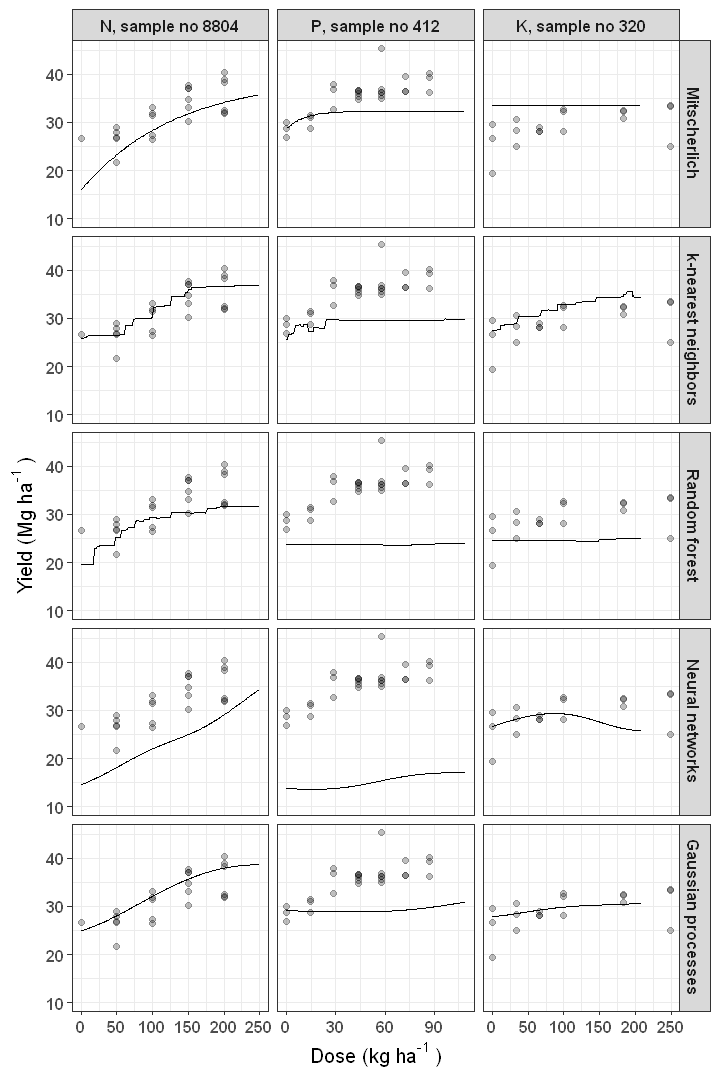

In [18]:
options(warn = -1)
options(repr.plot.width = 6, repr.plot.height = 9)
yield_model %>%
  mutate(Model = fct_relevel(Model, "Mitscherlich", "k-nearest neighbors", "Random forest", 
                             "Neural networks", "Gaussian processes")) %>%
  ggplot(aes(x = Dose, y = Prediction)) +
  facet_grid(Model ~ Fertilizer, scales = "free_x") +
  geom_line() +
  geom_point(data = yield_samples, aes(x = Dose, y = RendVendable), alpha = 0.25) +
  expand_limits(x = 10, y = 10) +
  labs(x = expression("Dose (kg ha"^"-1"~")"), y = expression("Yield (Mg ha"^"-1"~")")) +
  theme_bw() +
  theme(text = element_text(family = "Arial", face = "bold", size = 12)) +
  ggsave("plosFigs/Fig4.tiff", width = 6, height = 9, dpi = 300) +
  ggsave("images/Fig4.png", width = 6, height = 9, dpi = 300)
options(warn = 0)

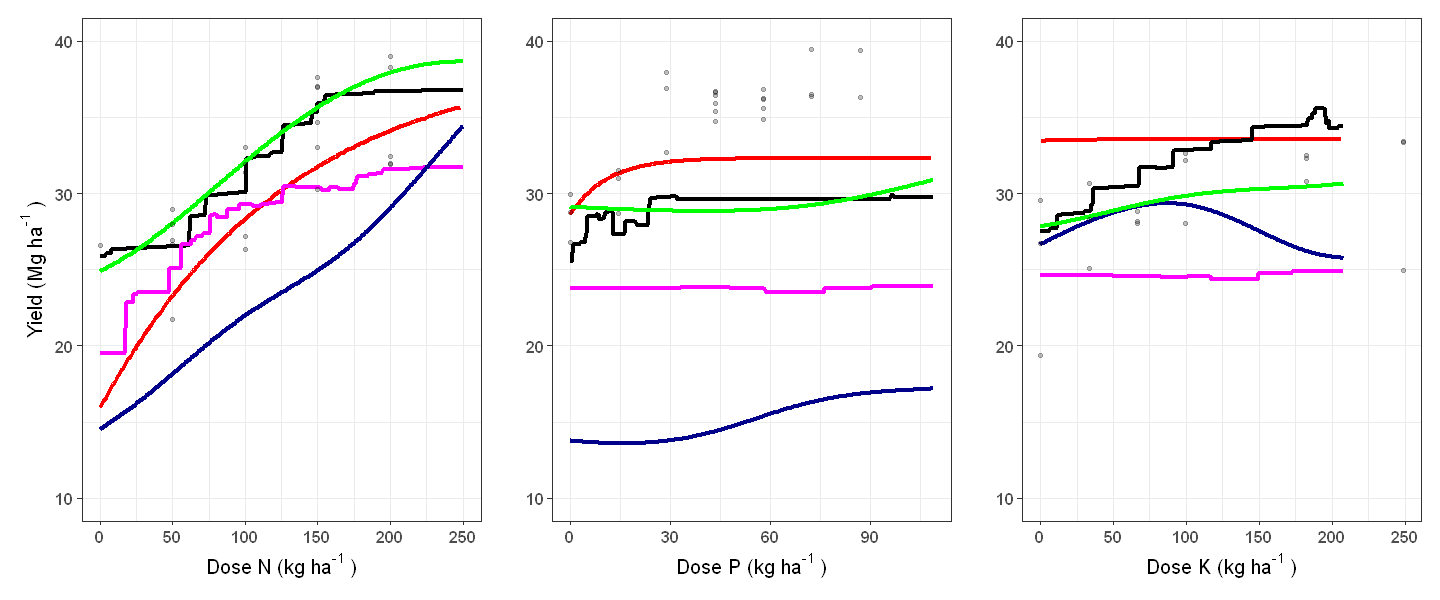

In [23]:
options(warn = -1)
options(repr.plot.width = 12, repr.plot.height = 5)
nplt = ggplot() + 
  geom_line(aes(x = Dose, y = Prediction), data = yield_mitsch_N, color = "red", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_N %>% filter(Model == "k-nearest neighbors"), color = "black", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_N %>% filter(Model == "Random forest"), color = "magenta", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_N %>% filter(Model == "Neural networks"), color = "darkblue", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_N %>% filter(Model == "Gaussian processes"), color = "green", lwd = 1.2) +
  geom_point(aes(x = Dose, y = RendVendable), data = yield_samples %>% filter(Fertilizer == "N, sample no 8804"), alpha = 0.25, lwd = 1.2) +
  ylim(10, 40) + theme_bw() +
  xlab(expression("Dose N (kg ha"^"-1"~")")) +
  ylab(expression("Yield (Mg ha"^"-1"~")")) +
  theme(text = element_text(family = "Arial", face = "bold", size = 12))
#nplt

pplt = ggplot() + 
  geom_line(aes(x = Dose, y = Prediction), data = yield_mitsch_P, color = "red", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_P %>% filter(Model == "k-nearest neighbors"), color = "black", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_P %>% filter(Model == "Random forest"), color = "magenta", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_P %>% filter(Model == "Neural networks"), color = "darkblue", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_P %>% filter(Model == "Gaussian processes"), color = "green", lwd = 1.2) +
  geom_point(aes(x = Dose, y = RendVendable), data = yield_samples %>% filter(Fertilizer == "P, sample no 412"), alpha = 0.25, lwd = 1.2) +
  ylim(10, 40) + theme_bw() +
  xlab("Dose P (kg ha"^"-1"~")") +
  ylab('') +
  theme(text = element_text(family = "Arial", face = "bold", size = 12))
#pplt

kplt = ggplot() + 
  geom_line(aes(x = Dose, y = Prediction), data = yield_mitsch_K, color = "red", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_K %>% filter(Model == "k-nearest neighbors"), color = "black", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_K %>% filter(Model == "Random forest"), color = "magenta", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_K %>% filter(Model == "Neural networks"), color = "darkblue", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_K %>% filter(Model == "Gaussian processes"), color = "green", lwd = 1.2) +
  geom_point(aes(x = Dose, y = RendVendable), data = yield_samples %>% filter(Fertilizer == "K, sample no 320"), alpha = 0.25, lwd = 1.2) +
  ylim(10, 40) + theme_bw() +
  xlab("Dose K (kg ha"^"-1"~")") +
  ylab('') +
  theme(text = element_text(family = "Arial", face = "bold", size = 12))
#kplt
nplt | pplt | kplt # patchwork
#ggsave("images/rdt.png", width = 12, height = 5)
options(warn = 0)

### __Figure 5__. Response curves: [M,S | L]

In [19]:
tsmsl_sample_N <- read_csv("output/tsizeMS_L_model_Ndata.csv")
tsmsl_sample_P <- read_csv("output/tsizeMS_L_model_Pdata.csv")
tsmsl_sample_K <- read_csv("output/tsizeMS_L_model_Kdata.csv")

Warning message:
"Missing column names filled in: 'X1' [1]"
Parsed with column specification:
cols(
  X1 = col_double(),
  tsizeMS_L = col_double(),
  NtotDose = col_double(),
  Sample = col_double()
)

Warning message:
"Missing column names filled in: 'X1' [1]"
Parsed with column specification:
cols(
  X1 = col_double(),
  tsizeMS_L = col_double(),
  PtotDose = col_double(),
  P = col_double(),
  Sample = col_double()
)

Warning message:
"Missing column names filled in: 'X1' [1]"
Parsed with column specification:
cols(
  X1 = col_double(),
  tsizeMS_L = col_double(),
  KtotDose = col_double(),
  K = col_double(),
  Sample = col_double()
)



In [20]:
tsmsl_sample_N <- tsmsl_sample_N %>%
  rename(Dose = NtotDose) %>%
  mutate(Fertilizer = paste("N, sample no", tsmsl_sample_N$Sample[1]))

tsmsl_sample_P <- tsmsl_sample_P %>%
  rename(Dose = P) %>%
  mutate(Fertilizer = paste("P, sample no", tsmsl_sample_P$Sample[1]))

tsmsl_sample_K <- tsmsl_sample_K %>%
  rename(Dose = K) %>%
  mutate(Fertilizer = paste("K, sample no", tsmsl_sample_K$Sample[1]))

In [21]:
tsmsl_samples <- tsmsl_sample_N %>%
  bind_rows(tsmsl_sample_P) %>%
  bind_rows(tsmsl_sample_K) %>%
  select(tsizeMS_L, Dose, Fertilizer) %>%
  mutate(Fertilizer = fct_relevel(Fertilizer, "N, sample no 8804", "P, sample no 412", "K, sample no 320"))

tsmsl_samples %>% head()

tsizeMS_L,Dose,Fertilizer
<dbl>,<dbl>,<fct>
-4.018722,0,"N, sample no 8804"
-1.838549,50,"N, sample no 8804"
-4.281222,50,"N, sample no 8804"
-4.196405,50,"N, sample no 8804"
-4.272177,50,"N, sample no 8804"
-1.668693,50,"N, sample no 8804"


In [22]:
tsmsl_model_N <- read_csv("output/tsizeMS_L_model_N.csv")
tsmsl_model_P <- read_csv("output/tsizeMS_L_model_P.csv")
tsmsl_model_K <- read_csv("output/tsizeMS_L_model_K.csv")

Warning message:
"Missing column names filled in: 'X1' [1]"
Parsed with column specification:
cols(
  X1 = col_double(),
  NtotDose = col_double(),
  PtotDose = col_double(),
  KtotDose = col_double(),
  ilr_knn = col_double(),
  ilr_rf = col_double(),
  ilr_nn = col_double(),
  ilr_gp = col_double()
)

Warning message:
"Missing column names filled in: 'X1' [1]"
Parsed with column specification:
cols(
  X1 = col_double(),
  NtotDose = col_double(),
  PtotDose = col_double(),
  KtotDose = col_double(),
  P = col_double(),
  ilr_knn = col_double(),
  ilr_rf = col_double(),
  ilr_nn = col_double(),
  ilr_gp = col_double()
)

Warning message:
"Missing column names filled in: 'X1' [1]"
Parsed with column specification:
cols(
  X1 = col_double(),
  NtotDose = col_double(),
  PtotDose = col_double(),
  KtotDose = col_double(),
  K = col_double(),
  ilr_knn = col_double(),
  ilr_rf = col_double(),
  ilr_nn = col_double(),
  ilr_gp = col_double()
)



In [23]:
tsmsl_model_N <- tsmsl_model_N %>% 
  mutate(Dose = NtotDose) %>%
  select(Dose, starts_with("ilr")) %>%
  pivot_longer(names_to = "Model", values_to = "Prediction", -Dose) %>%
  mutate(Model = str_replace(Model, "ilr_knn", "k-nearest neighbors"),
         Model = str_replace(Model, "ilr_rf", "Random forest"),
         Model = str_replace(Model, "ilr_nn", "Neural networks"),
         Model = str_replace(Model, "ilr_gp", "Gaussian processes"),
         Fertilizer = paste("N, sample no", tsmsl_sample_N$Sample[1]))

tsmsl_model_P <- tsmsl_model_P %>% 
  mutate(Dose = P) %>%
  select(Dose, starts_with("ilr")) %>%
  pivot_longer(names_to = "Model", values_to = "Prediction", -Dose) %>%
  mutate(Model = str_replace(Model, "ilr_knn", "k-nearest neighbors"),
         Model = str_replace(Model, "ilr_rf", "Random forest"),
         Model = str_replace(Model, "ilr_nn", "Neural networks"),
         Model = str_replace(Model, "ilr_gp", "Gaussian processes"),
         Fertilizer = paste("P, sample no", tsmsl_sample_P$Sample[1]))

tsmsl_model_K <- tsmsl_model_K %>% 
  mutate(Dose = K) %>%
  select(Dose, starts_with("ilr")) %>%
  pivot_longer(names_to = "Model", values_to = "Prediction", -Dose) %>%
  mutate(Model = str_replace(Model, "ilr_knn", "k-nearest neighbors"),
         Model = str_replace(Model, "ilr_rf", "Random forest"),
         Model = str_replace(Model, "ilr_nn", "Neural networks"),
         Model = str_replace(Model, "ilr_gp", "Gaussian processes"),
         Fertilizer = paste("K, sample no", tsmsl_sample_K$Sample[1]))

In [24]:
tsmsl_model <- bind_rows(tsmsl_model_N) %>%
  bind_rows(tsmsl_model_P) %>%
  bind_rows(tsmsl_model_K) %>%
  mutate(Fertilizer = fct_relevel(Fertilizer, "N, sample no 8804", "P, sample no 412", "K, sample no 320"))

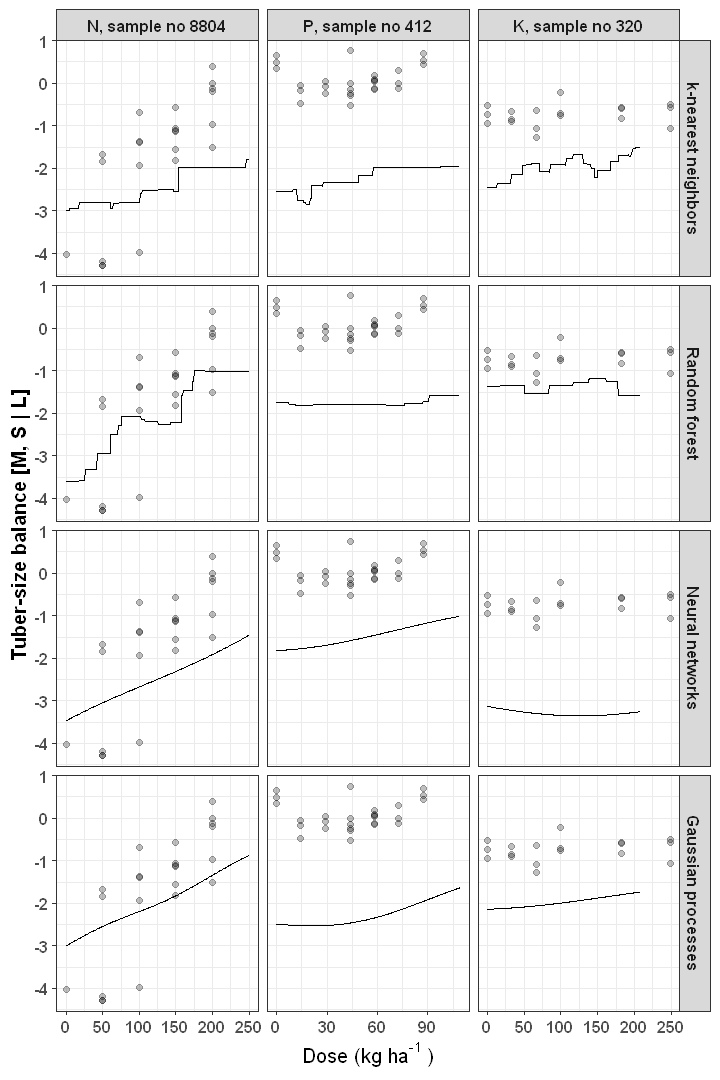

In [25]:
options(warn = -1)
tsmsl_model %>%
  mutate(Model = fct_relevel(Model, "k-nearest neighbors", "Random forest", "Neural networks", "Gaussian processes")) %>%
  ggplot(aes(x = Dose, y = Prediction)) +
  facet_grid(Model ~ Fertilizer, scales = "free_x") +
  geom_line() +
  geom_point(data = tsmsl_samples, aes(x = Dose, y = tsizeMS_L), alpha = 0.25) +
  expand_limits(x = 0, y = 0) +
  labs(x = expression("Dose (kg ha"^"-1"~")"), y = "Tuber-size balance [M, S | L]") +
  theme_bw() +
  theme(text = element_text(family = "Arial", face = "bold", size = 12)) +
  ggsave("plosFigs/Fig5.tiff", width = 6, height = 9, dpi = 300) +
  ggsave("images/Fig5.png", width = 6, height = 9, dpi = 300)
options(warn = 0)

In [ ]:
options(warn = -1)
options(repr.plot.width = 12, repr.plot.height = 5)
nplt = ggplot() + 
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_N %>% filter(Model == "k-nearest neighbors"), color = "black", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_N %>% filter(Model == "Random forest"), color = "magenta", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_N %>% filter(Model == "Neural networks"), color = "darkblue", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_N %>% filter(Model == "Gaussian processes"), color = "green", lwd = 1.2) +
  geom_point(aes(x = Dose, y = RendVendable), data = yield_samples %>% filter(Fertilizer == "N, sample no 8804"), alpha = 0.25, lwd = 1.2) +
  ylim(10, 40) + theme_bw() +
  xlab(expression("Dose N (kg ha"^"-1"~")")) +
  ylab(expression("Yield (Mg ha"^"-1"~")")) +
  theme(text = element_text(family = "Arial", face = "bold", size = 12))
#nplt

pplt = ggplot() + 
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_P %>% filter(Model == "k-nearest neighbors"), color = "black", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_P %>% filter(Model == "Random forest"), color = "magenta", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_P %>% filter(Model == "Neural networks"), color = "darkblue", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_P %>% filter(Model == "Gaussian processes"), color = "green", lwd = 1.2) +
  geom_point(aes(x = Dose, y = RendVendable), data = yield_samples %>% filter(Fertilizer == "P, sample no 412"), alpha = 0.25, lwd = 1.2) +
  ylim(10, 40) + theme_bw() +
  xlab("Dose P (kg ha"^"-1"~")") +
  ylab('') +
  theme(text = element_text(family = "Arial", face = "bold", size = 12))
#pplt

kplt = ggplot() + 
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_K %>% filter(Model == "k-nearest neighbors"), color = "black", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_K %>% filter(Model == "Random forest"), color = "magenta", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_K %>% filter(Model == "Neural networks"), color = "darkblue", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_K %>% filter(Model == "Gaussian processes"), color = "green", lwd = 1.2) +
  geom_point(aes(x = Dose, y = RendVendable), data = yield_samples %>% filter(Fertilizer == "K, sample no 320"), alpha = 0.25, lwd = 1.2) +
  ylim(10, 40) + theme_bw() +
  xlab("Dose K (kg ha"^"-1"~")") +
  ylab('') +
  theme(text = element_text(family = "Arial", face = "bold", size = 12))
#kplt
nplt | pplt | kplt # patchwork
ggsave("images/rdt.png", width = 12, height = 5)
options(warn = 0)

### __Figure 6__. Response curves: [M | S]

In [26]:
tsms_sample_N <- read_csv("output/tsizeM_S_model_Ndata.csv")
tsms_sample_P <- read_csv("output/tsizeM_S_model_Pdata.csv")
tsms_sample_K <- read_csv("output/tsizeM_S_model_Kdata.csv")

Warning message:
"Missing column names filled in: 'X1' [1]"
Parsed with column specification:
cols(
  X1 = col_double(),
  tsizeS_M = col_double(),
  NtotDose = col_double(),
  Sample = col_double()
)

Warning message:
"Missing column names filled in: 'X1' [1]"
Parsed with column specification:
cols(
  X1 = col_double(),
  tsizeS_M = col_double(),
  PtotDose = col_double(),
  P = col_double(),
  Sample = col_double()
)

Warning message:
"Missing column names filled in: 'X1' [1]"
Parsed with column specification:
cols(
  X1 = col_double(),
  tsizeS_M = col_double(),
  KtotDose = col_double(),
  K = col_double(),
  Sample = col_double()
)



In [27]:
tsms_sample_N <- tsms_sample_N %>%
  rename(Dose = NtotDose) %>%
  mutate(Fertilizer = paste("N, sample no", tsms_sample_N$Sample[1]))

tsms_sample_P <- tsms_sample_P %>%
  rename(Dose = P) %>%
  mutate(Fertilizer = paste("P, sample no", tsms_sample_P$Sample[1]))

tsms_sample_K <- tsms_sample_K %>%
  rename(Dose = K) %>%
  mutate(Fertilizer = paste("K, sample no", tsms_sample_K$Sample[1]))

In [28]:
tsms_samples <- tsms_sample_N %>%
  bind_rows(tsms_sample_P) %>%
  bind_rows(tsms_sample_K) %>%
  select(tsizeS_M, Dose, Fertilizer) %>%
  mutate(Fertilizer = fct_relevel(Fertilizer, "N, sample no 8804", "P, sample no 412", "K, sample no 320"))

tsms_samples %>% head()

tsizeS_M,Dose,Fertilizer
<dbl>,<dbl>,<fct>
1.803232,0,"N, sample no 8804"
1.014698,50,"N, sample no 8804"
1.224393,50,"N, sample no 8804"
1.424784,50,"N, sample no 8804"
1.246670,50,"N, sample no 8804"
1.464258,50,"N, sample no 8804"


In [29]:
tsms_model_N <- read_csv("output/tsizeM_S_model_N.csv")
tsms_model_P <- read_csv("output/tsizeM_S_model_P.csv")
tsms_model_K <- read_csv("output/tsizeM_S_model_K.csv")

Warning message:
"Missing column names filled in: 'X1' [1]"
Parsed with column specification:
cols(
  X1 = col_double(),
  NtotDose = col_double(),
  PtotDose = col_double(),
  KtotDose = col_double(),
  ilr_knn = col_double(),
  ilr_rf = col_double(),
  ilr_nn = col_double(),
  ilr_gp = col_double()
)

Warning message:
"Missing column names filled in: 'X1' [1]"
Parsed with column specification:
cols(
  X1 = col_double(),
  NtotDose = col_double(),
  PtotDose = col_double(),
  KtotDose = col_double(),
  P = col_double(),
  ilr_knn = col_double(),
  ilr_rf = col_double(),
  ilr_nn = col_double(),
  ilr_gp = col_double()
)

Warning message:
"Missing column names filled in: 'X1' [1]"
Parsed with column specification:
cols(
  X1 = col_double(),
  NtotDose = col_double(),
  PtotDose = col_double(),
  KtotDose = col_double(),
  K = col_double(),
  ilr_knn = col_double(),
  ilr_rf = col_double(),
  ilr_nn = col_double(),
  ilr_gp = col_double()
)



In [30]:
tsms_model_N <- tsms_model_N %>% 
  mutate(Dose = NtotDose) %>%
  select(Dose, starts_with("ilr")) %>%
  pivot_longer(names_to = "Model", values_to = "Prediction", -Dose) %>%
  mutate(Model = str_replace(Model, "ilr_knn", "k-nearest neighbors"),
         Model = str_replace(Model, "ilr_rf", "Random forest"),
         Model = str_replace(Model, "ilr_nn", "Neural networks"),
         Model = str_replace(Model, "ilr_gp", "Gaussian processes"),
         Fertilizer = paste("N, sample no", tsms_sample_N$Sample[1]))

tsms_model_P <- tsms_model_P %>% 
  mutate(Dose = P) %>%
  select(Dose, starts_with("ilr")) %>%
  pivot_longer(names_to = "Model", values_to = "Prediction", -Dose) %>%
  mutate(Model = str_replace(Model, "ilr_knn", "k-nearest neighbors"),
         Model = str_replace(Model, "ilr_rf", "Random forest"),
         Model = str_replace(Model, "ilr_nn", "Neural networks"),
         Model = str_replace(Model, "ilr_gp", "Gaussian processes"),
         Fertilizer = paste("P, sample no", tsms_sample_P$Sample[1]))

tsms_model_K <- tsms_model_K %>% 
  mutate(Dose = K) %>%
  select(Dose, starts_with("ilr")) %>%
  pivot_longer(names_to = "Model", values_to = "Prediction", -Dose) %>%
  mutate(Model = str_replace(Model, "ilr_knn", "k-nearest neighbors"),
         Model = str_replace(Model, "ilr_rf", "Random forest"),
         Model = str_replace(Model, "ilr_nn", "Neural networks"),
         Model = str_replace(Model, "ilr_gp", "Gaussian processes"),
         Fertilizer = paste("K, sample no", tsms_sample_K$Sample[1]))

In [31]:
tsms_model <- bind_rows(tsms_model_N) %>%
  bind_rows(tsms_model_P) %>%
  bind_rows(tsms_model_K) %>%
  mutate(Fertilizer = fct_relevel(Fertilizer, "N, sample no 8804", "P, sample no 412", "K, sample no 320"))

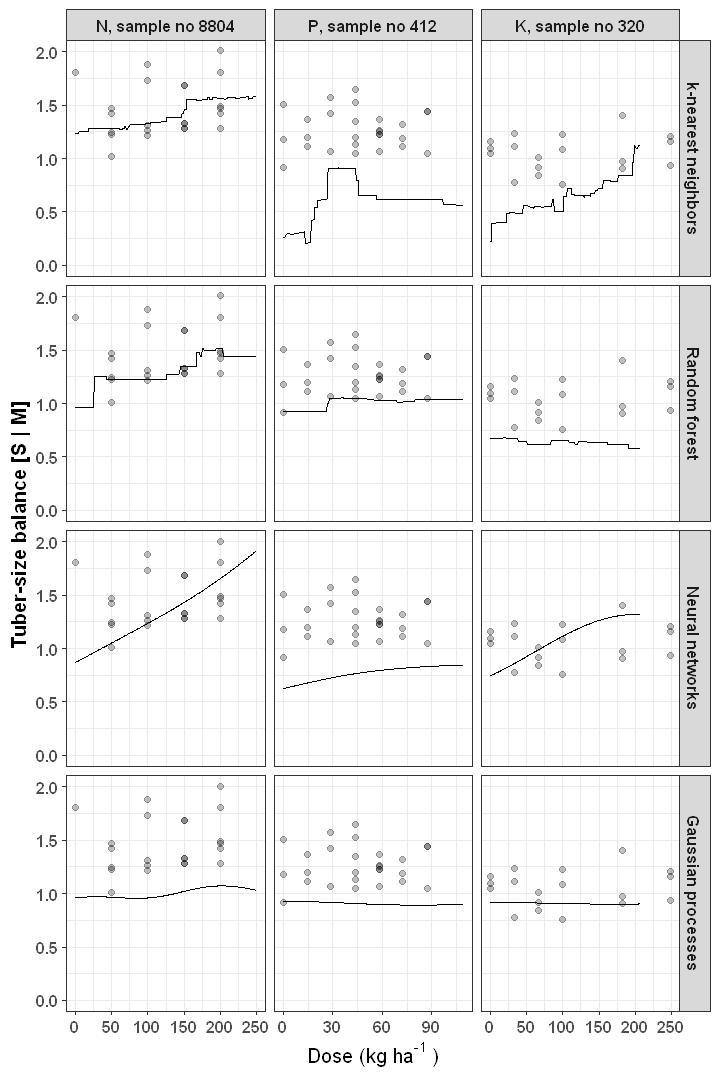

In [32]:
options(warn = -1)
tsms_model %>%
  mutate(Model = fct_relevel(Model, "k-nearest neighbors", "Random forest", "Neural networks", "Gaussian processes")) %>%
  ggplot(aes(x = Dose, y = Prediction)) +
  facet_grid(Model ~ Fertilizer, scales = "free_x") +
  geom_line() +
  geom_point(data = tsms_samples, aes(x = Dose, y = tsizeS_M), alpha = 0.25) +
  expand_limits(x = 0, y = 0) +
  labs(x = expression("Dose (kg ha"^"-1"~")"), y = "Tuber-size balance [S | M]") +
  theme_bw() +
  theme(text = element_text(family = "Arial", face = "bold", size = 12)) +
  ggsave("plosFigs/Fig6.tiff", width = 6, height = 9, dpi = 300) +
  ggsave("images/Fig6.png", width = 6, height = 9, dpi = 300)
options(warn = 0)

In [ ]:
options(warn = -1)
options(repr.plot.width = 12, repr.plot.height = 5)
nplt = ggplot() + 
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_N %>% filter(Model == "k-nearest neighbors"), color = "black", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_N %>% filter(Model == "Random forest"), color = "magenta", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_N %>% filter(Model == "Neural networks"), color = "darkblue", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_N %>% filter(Model == "Gaussian processes"), color = "green", lwd = 1.2) +
  geom_point(aes(x = Dose, y = RendVendable), data = yield_samples %>% filter(Fertilizer == "N, sample no 8804"), alpha = 0.25, lwd = 1.2) +
  ylim(10, 40) + theme_bw() +
  xlab(expression("Dose N (kg ha"^"-1"~")")) +
  ylab(expression("Yield (Mg ha"^"-1"~")")) +
  theme(text = element_text(family = "Arial", face = "bold", size = 12))
#nplt

pplt = ggplot() + 
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_P %>% filter(Model == "k-nearest neighbors"), color = "black", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_P %>% filter(Model == "Random forest"), color = "magenta", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_P %>% filter(Model == "Neural networks"), color = "darkblue", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_P %>% filter(Model == "Gaussian processes"), color = "green", lwd = 1.2) +
  geom_point(aes(x = Dose, y = RendVendable), data = yield_samples %>% filter(Fertilizer == "P, sample no 412"), alpha = 0.25, lwd = 1.2) +
  ylim(10, 40) + theme_bw() +
  xlab("Dose P (kg ha"^"-1"~")") +
  ylab('') +
  theme(text = element_text(family = "Arial", face = "bold", size = 12))
#pplt

kplt = ggplot() + 
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_K %>% filter(Model == "k-nearest neighbors"), color = "black", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_K %>% filter(Model == "Random forest"), color = "magenta", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_K %>% filter(Model == "Neural networks"), color = "darkblue", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_K %>% filter(Model == "Gaussian processes"), color = "green", lwd = 1.2) +
  geom_point(aes(x = Dose, y = RendVendable), data = yield_samples %>% filter(Fertilizer == "K, sample no 320"), alpha = 0.25, lwd = 1.2) +
  ylim(10, 40) + theme_bw() +
  xlab("Dose K (kg ha"^"-1"~")") +
  ylab('') +
  theme(text = element_text(family = "Arial", face = "bold", size = 12))
#kplt
nplt | pplt | kplt # patchwork
ggsave("images/rdt.png", width = 12, height = 5)
options(warn = 0)

### __Figure 7__. Response curves: specific gravity

In [33]:
sg_sample_N <- read_csv("output/sg_model_Ndata.csv")
sg_sample_P <- read_csv("output/sg_model_Pdata.csv")
sg_sample_K <- read_csv("output/sg_model_Kdata.csv")

Warning message:
"Missing column names filled in: 'X1' [1]"
Parsed with column specification:
cols(
  X1 = col_double(),
  PoidsSpec = col_double(),
  NtotDose = col_double(),
  Sample = col_double()
)

Warning message:
"Missing column names filled in: 'X1' [1]"
Parsed with column specification:
cols(
  X1 = col_double(),
  PoidsSpec = col_double(),
  PtotDose = col_double(),
  P = col_double(),
  Sample = col_double()
)

Warning message:
"Missing column names filled in: 'X1' [1]"
Parsed with column specification:
cols(
  X1 = col_double(),
  PoidsSpec = col_double(),
  KtotDose = col_double(),
  K = col_double(),
  Sample = col_double()
)



In [34]:
sg_sample_N <- sg_sample_N %>%
  rename(Dose = NtotDose) %>%
  mutate(Fertilizer = paste("N, sample no", sg_sample_N$Sample[1]))

sg_sample_P <- sg_sample_P %>%
  rename(Dose = P) %>%
  mutate(Fertilizer = paste("P, sample no", sg_sample_P$Sample[1]))

sg_sample_K <- sg_sample_K %>%
  rename(Dose = K) %>%
  mutate(Fertilizer = paste("K, sample no", sg_sample_K$Sample[1]))

In [35]:
sg_samples <- sg_sample_N %>%
  bind_rows(sg_sample_P) %>%
  bind_rows(sg_sample_K) %>%
  select(PoidsSpec, Dose, Fertilizer) %>%
  mutate(Fertilizer = fct_relevel(Fertilizer, "N, sample no 8804", "P, sample no 412", "K, sample no 320"))

sg_samples %>% head()

PoidsSpec,Dose,Fertilizer
<dbl>,<dbl>,<fct>
1.068919,0,"N, sample no 8804"
1.076795,50,"N, sample no 8804"
1.074390,50,"N, sample no 8804"
1.075422,50,"N, sample no 8804"
1.071162,50,"N, sample no 8804"
1.078440,50,"N, sample no 8804"


In [36]:
sg_model_N <- read_csv("output/sg_model_N.csv")
sg_model_P <- read_csv("output/sg_model_P.csv")
sg_model_K <- read_csv("output/sg_model_K.csv")

Warning message:
"Missing column names filled in: 'X1' [1]"
Parsed with column specification:
cols(
  X1 = col_double(),
  NtotDose = col_double(),
  PtotDose = col_double(),
  KtotDose = col_double(),
  pspe_knn = col_double(),
  pspe_rf = col_double(),
  pspe_nn = col_double(),
  pspe_gp = col_double()
)

Warning message:
"Missing column names filled in: 'X1' [1]"
Parsed with column specification:
cols(
  X1 = col_double(),
  NtotDose = col_double(),
  PtotDose = col_double(),
  KtotDose = col_double(),
  P = col_double(),
  pspe_knn = col_double(),
  pspe_rf = col_double(),
  pspe_nn = col_double(),
  pspe_gp = col_double()
)

Warning message:
"Missing column names filled in: 'X1' [1]"
Parsed with column specification:
cols(
  X1 = col_double(),
  NtotDose = col_double(),
  PtotDose = col_double(),
  KtotDose = col_double(),
  K = col_double(),
  pspe_knn = col_double(),
  pspe_rf = col_double(),
  pspe_nn = col_double(),
  pspe_gp = col_double()
)



In [37]:
sg_model_N <- sg_model_N %>% 
  mutate(Dose = NtotDose) %>%
  select(Dose, starts_with("pspe")) %>%
  pivot_longer(names_to = "Model", values_to = "Prediction", -Dose) %>%
  mutate(Model = str_replace(Model, "pspe_knn", "k-nearest neighbors"),
         Model = str_replace(Model, "pspe_rf", "Random forest"),
         Model = str_replace(Model, "pspe_nn", "Neural networks"),
         Model = str_replace(Model, "pspe_gp", "Gaussian processes"),
         Fertilizer = paste("N, sample no", sg_sample_N$Sample[1]))

sg_model_P <- sg_model_P %>% 
  mutate(Dose = P) %>%
  select(Dose, starts_with("pspe")) %>%
  pivot_longer(names_to = "Model", values_to = "Prediction", -Dose) %>%
  mutate(Model = str_replace(Model, "pspe_knn", "k-nearest neighbors"),
         Model = str_replace(Model, "pspe_rf", "Random forest"),
         Model = str_replace(Model, "pspe_nn", "Neural networks"),
         Model = str_replace(Model, "pspe_gp", "Gaussian processes"),
         Fertilizer = paste("P, sample no", sg_sample_P$Sample[1]))

sg_model_K <- sg_model_K %>% 
  mutate(Dose = KtotDose) %>%
  select(Dose, starts_with("pspe")) %>%
  pivot_longer(names_to = "Model", values_to = "Prediction", -Dose) %>%
  mutate(Model = str_replace(Model, "pspe_knn", "k-nearest neighbors"),
         Model = str_replace(Model, "pspe_rf", "Random forest"),
         Model = str_replace(Model, "pspe_nn", "Neural networks"),
         Model = str_replace(Model, "pspe_gp", "Gaussian processes"),
         Fertilizer = paste("K, sample no", sg_sample_K$Sample[1]))

In [38]:
sg_model <- bind_rows(sg_model_N) %>%
  bind_rows(sg_model_P) %>%
  bind_rows(sg_model_K) %>%
  mutate(Fertilizer = fct_relevel(Fertilizer, "N, sample no 8804", "P, sample no 412", "K, sample no 320"))

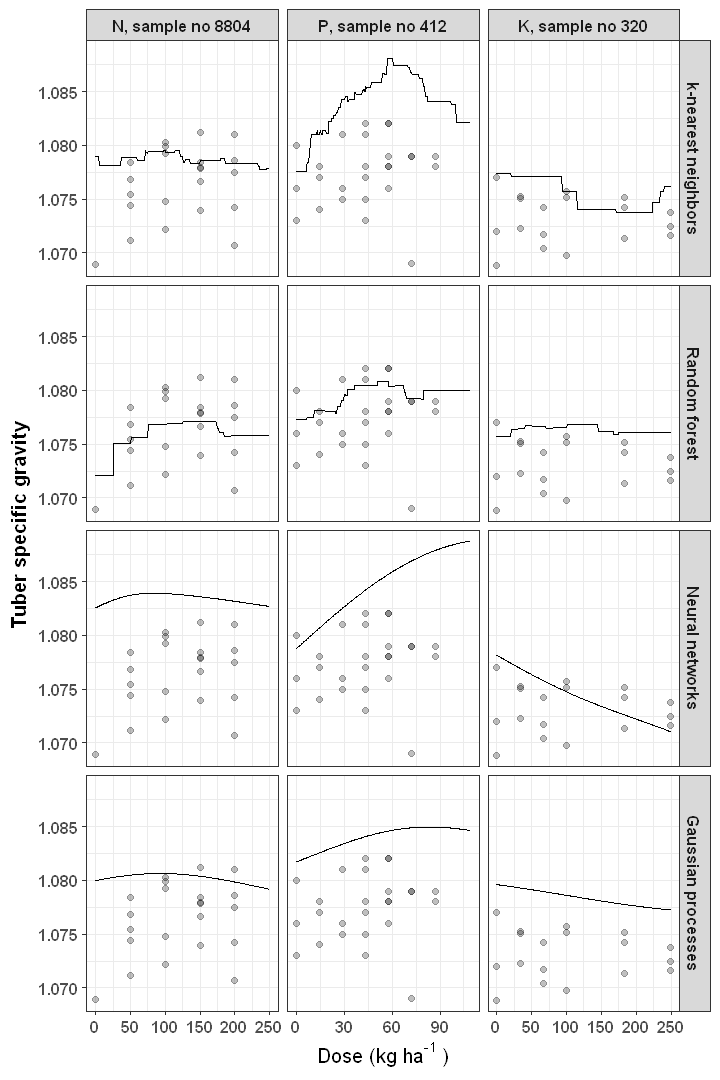

In [39]:
options(warn = -1)
sg_model %>%
  mutate(Model = fct_relevel(Model, "k-nearest neighbors", "Random forest", "Neural networks", "Gaussian processes")) %>%
  ggplot(aes(x = Dose, y = Prediction)) +
  facet_grid(Model ~ Fertilizer, scales = "free_x") +
  geom_line() +
  geom_point(data = sg_samples, aes(x = Dose, y = PoidsSpec), alpha = 0.25) +
  labs(x = expression("Dose (kg ha"^"-1"~")"), y = "Tuber specific gravity") +
  theme_bw() +
  theme(text = element_text(family = "Arial", face = "bold", size = 12)) +
  ggsave("plosFigs/Fig7.tiff", width = 6, height = 9, dpi = 300) +
  ggsave("images/Fig7.png", width = 6, height = 9, dpi = 300)
options(warn = 0)

In [ ]:
options(warn = -1)
options(repr.plot.width = 12, repr.plot.height = 5)
nplt = ggplot() + 
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_N %>% filter(Model == "k-nearest neighbors"), color = "black", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_N %>% filter(Model == "Random forest"), color = "magenta", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_N %>% filter(Model == "Neural networks"), color = "darkblue", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_N %>% filter(Model == "Gaussian processes"), color = "green", lwd = 1.2) +
  geom_point(aes(x = Dose, y = RendVendable), data = yield_samples %>% filter(Fertilizer == "N, sample no 8804"), alpha = 0.25, lwd = 1.2) +
  ylim(10, 40) + theme_bw() +
  xlab(expression("Dose N (kg ha"^"-1"~")")) +
  ylab(expression("Yield (Mg ha"^"-1"~")")) +
  theme(text = element_text(family = "Arial", face = "bold", size = 12))
#nplt

pplt = ggplot() + 
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_P %>% filter(Model == "k-nearest neighbors"), color = "black", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_P %>% filter(Model == "Random forest"), color = "magenta", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_P %>% filter(Model == "Neural networks"), color = "darkblue", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_P %>% filter(Model == "Gaussian processes"), color = "green", lwd = 1.2) +
  geom_point(aes(x = Dose, y = RendVendable), data = yield_samples %>% filter(Fertilizer == "P, sample no 412"), alpha = 0.25, lwd = 1.2) +
  ylim(10, 40) + theme_bw() +
  xlab("Dose P (kg ha"^"-1"~")") +
  ylab('') +
  theme(text = element_text(family = "Arial", face = "bold", size = 12))
#pplt

kplt = ggplot() + 
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_K %>% filter(Model == "k-nearest neighbors"), color = "black", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_K %>% filter(Model == "Random forest"), color = "magenta", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_K %>% filter(Model == "Neural networks"), color = "darkblue", lwd = 1.2) +
  geom_line(aes(x = Dose, y = Prediction), data = yield_model_K %>% filter(Model == "Gaussian processes"), color = "green", lwd = 1.2) +
  geom_point(aes(x = Dose, y = RendVendable), data = yield_samples %>% filter(Fertilizer == "K, sample no 320"), alpha = 0.25, lwd = 1.2) +
  ylim(10, 40) + theme_bw() +
  xlab("Dose K (kg ha"^"-1"~")") +
  ylab('') +
  theme(text = element_text(family = "Arial", face = "bold", size = 12))
#kplt
nplt | pplt | kplt # patchwork
ggsave("images/rdt.png", width = 12, height = 5)
options(warn = 0)

### __Figure 8__. Optimal economic doses

In [40]:
pred <- read.csv('output/predMitsch.csv') %>%
    bind_rows(read.csv('output/predYield.csv')) %>% 
    bind_rows(read.csv('output/predMsl.csv')) %>% 
    bind_rows(read.csv('output/predMs.csv')) %>%
    bind_rows(read.csv('output/predSg.csv')) %>% 
    rename(Model = X,
           N = NtotDose,
           P = PtotDose, # already converted to P
           K = KtotDose) %>% # already converted to K
    mutate(Model = as.character(Model))
pred$Model[is.na(pred$Model)] <- "Mitscherlich"
pred 

Warning message in bind_rows_(x, .id):
"Unequal factor levels: coercing to character"
Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"
Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"
Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"
Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"


N,P,K,Output,Target,Model
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
154.4034,81.54881,11.07511,32.1670,Yield,Mitscherlich
39.8500,106.11804,120.05950,30.1300,Yield,k-nearest neighbors
188.6500,106.84616,76.06120,31.5600,Yield,Random forest
241.5600,84.92408,11.80260,42.3800,Yield,Neural networks
247.9800,63.86092,63.77720,33.1500,Yield,Gaussian processes
245.8200,5.12300,16.64980,-2.7800,"[M, S | L]",k-nearest neighbors
202.4700,7.80004,184.77460,-1.0400,"[M, S | L]",Random forest
245.8200,5.12300,16.64980,-2.1700,"[M, S | L]",Neural networks
229.6300,107.38680,1.79280,-2.7500,"[M, S | L]",Gaussian processes


In [41]:
pred_doses <- pred %>%
  pivot_longer(names_to = "variable", values_to = "value", -c("Output", "Target", "Model"))
pred_doses %>% head()

Output,Target,Model,variable,value
<dbl>,<chr>,<chr>,<chr>,<dbl>
32.167,Yield,Mitscherlich,N,154.40340
32.167,Yield,Mitscherlich,P,81.54881
32.167,Yield,Mitscherlich,K,11.07511
30.130,Yield,k-nearest neighbors,N,39.85000
30.130,Yield,k-nearest neighbors,P,106.11804
30.130,Yield,k-nearest neighbors,K,120.05950


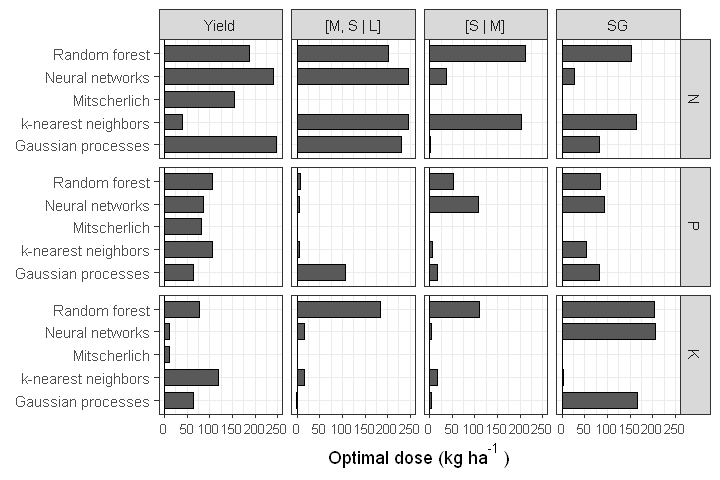

In [42]:
pred_doses$Target <- pred_doses$Target %>% fct_relevel('Yield', '[M, S | L]', '[S | M]', 'SG')
pred_doses$variable <- pred_doses$variable %>% fct_relevel('N', 'P', 'K')
options(repr.plot.height = 5, repr.plot.height = 4)
doses <- ggplot(aes(x = Model, y = value), data = pred_doses) + 
  geom_col(position = "dodge", colour = "black", width = 0.7) +
  facet_grid(variable ~ Target) +
  geom_hline(yintercept = 0, linetype = 1) +
  coord_flip() + 
  theme(text = element_text(family = "Arial", face = "bold", size = 12)) + 
  theme_bw() +
  theme(axis.text.x = element_text(size = 8), axis.title.y = element_blank()) +
  labs(y = expression("Optimal dose (kg ha"^"-1"~")"))
doses

In [43]:
pred$Target[pred$Target == 'Yield'] <- "Yield (Mg/ha)"
pred$Target <- pred$Target %>% fct_relevel('Yield (Mg/ha)', '[M, S | L]', '[S | M]', 'SG')
pred

N,P,K,Output,Target,Model
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
154.4034,81.54881,11.07511,32.1670,Yield (Mg/ha),Mitscherlich
39.8500,106.11804,120.05950,30.1300,Yield (Mg/ha),k-nearest neighbors
188.6500,106.84616,76.06120,31.5600,Yield (Mg/ha),Random forest
241.5600,84.92408,11.80260,42.3800,Yield (Mg/ha),Neural networks
247.9800,63.86092,63.77720,33.1500,Yield (Mg/ha),Gaussian processes
245.8200,5.12300,16.64980,-2.7800,"[M, S | L]",k-nearest neighbors
202.4700,7.80004,184.77460,-1.0400,"[M, S | L]",Random forest
245.8200,5.12300,16.64980,-2.1700,"[M, S | L]",Neural networks
229.6300,107.38680,1.79280,-2.7500,"[M, S | L]",Gaussian processes


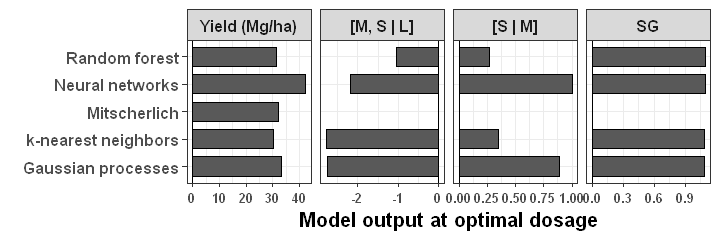

In [44]:
options(warn = -1)
options(repr.plot.height = 2)
out <- ggplot(aes(x = Model, y = Output), data = pred %>% select(Output, Target, Model)) + 
  geom_col(position = "dodge", colour = "black", width = 0.7) +
  facet_grid(. ~ Target, scale = "free") +
  coord_flip() + theme_bw() + geom_hline(yintercept = 0, linetype = 1) +
  theme(text = element_text(family = "Arial", face = "bold", size = 12)) +
  theme(axis.text.x = element_text(size = 8), axis.title.y = element_blank()) +
  labs(y = "Model output at optimal dosage")
out
options(warn = 0)

[Multiple plots in ggplot2 with patchwork](https://github.com/thomasp85/patchwork)

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



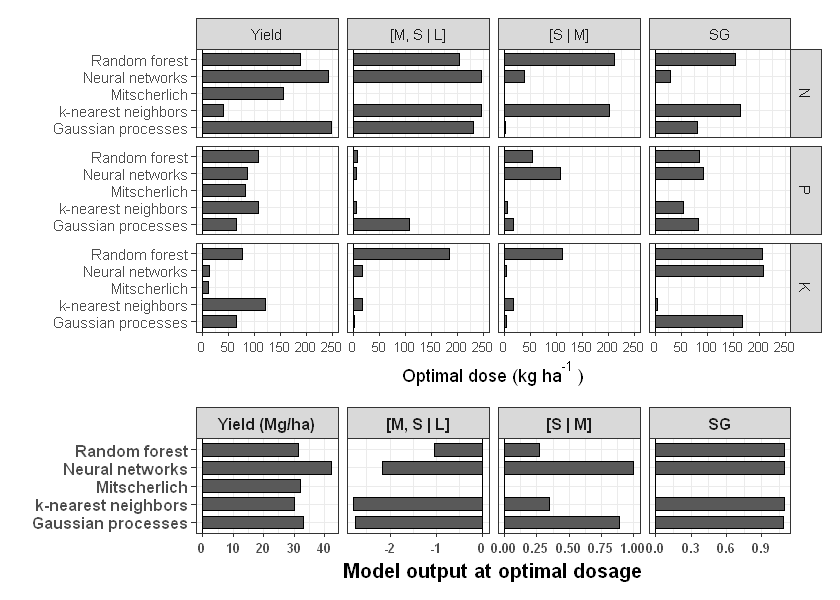

In [45]:
options(warn = -1)
options(repr.plot.width = 7, repr.plot.height = 5)
doses + out + plot_layout(nrow = 2, heights = c(3, 1)) +
    ggsave("plosFigs/Fig8.tiff") + #, width = 6, height = 4, dpi = 300) +
    ggsave("images/Fig8.png")#, width = 6, height = 4, dpi = 300)
options(warn = 0)